Nama= Muhammad Rizki Darmawan,
username= muhammad_rizki_darmawan_XnNu,
hp=087878588483,
tempat tinggal=Depok,
kota lahir=Bogor,
pendidikan terakihr=SMA,
instansi=Universitas Gadjah Mada,
Mahasiswa

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-14 04:16:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  2.11MB/s    in 3m 0s   

2021-06-14 04:19:51 (1.71 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [ ]:
import zipfile, os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('content')
zip_ref.close()

base_dir = 'content/content/rockpaperscissors'






In [ ]:
f_paper = os.path.join('/content/content/rockpaperscissors/paper')
f_rock = os.path.join('/content/content/rockpaperscissors/rock')
f_scissors = os.path.join('/content/content/rockpaperscissors/scissors')

f_paper1 = os.path.join('/content/content/rockpaperscissors/rps-cv-images/paper')

print(len(os.listdir(f_paper)), len(os.listdir(f_rock)), len(os.listdir(f_scissors)))
gunting = os.listdir(f_paper)[:3]
batu = os.listdir(f_rock)[:3]
kertas =os.listdir(f_scissors)[:3]
print(gunting, batu, kertas)

712 726 750
['PwkqvoT0noMITNaF.png', '2F8Ng7620ANA7tEK.png', 'BH9zAUdmmjlfXwtS.png'] ['ktot0Gt2YvkPXl1X.png', 'fK7m8vZQS1RUHcMr.png', 'yF6HU2xSYYVTtH91.png'] ['ntwoVP9pgUbs3LGq.png', 'inP9wrbC4x26yBW9.png', 'XSI0ZmaJN2CfPs3B.png']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/content/rockpaperscissors/rps-cv-images'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split=0.4 
)



In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    shuffle=True,
    subset = 'validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)            

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/20
32/32 - 26s - loss: 0.9804 - accuracy: 0.4746 - val_loss: 0.8247 - val_accuracy: 0.6797
Epoch 2/20
32/32 - 25s - loss: 0.6139 - accuracy: 0.7559 - val_loss: 0.5070 - val_accuracy: 0.7734
Epoch 3/20
32/32 - 25s - loss: 0.3619 - accuracy: 0.8632 - val_loss: 0.2166 - val_accuracy: 0.9141
Epoch 4/20
32/32 - 25s - loss: 0.1665 - accuracy: 0.9453 - val_loss: 0.1371 - val_accuracy: 0.9531
Epoch 5/20
32/32 - 25s - loss: 0.1527 - accuracy: 0.9457 - val_loss: 0.2079 - val_accuracy: 0.9062
Epoch 6/20
32/32 - 25s - loss: 0.1916 - accuracy: 0.9346 - val_loss: 0.1462 - val_accuracy: 0.9453
Epoch 7/20
32/32 - 25s - loss: 0.1579 - accuracy: 0.9443 - val_loss: 0.0893 - val_accuracy: 0.9688
Epoch 8/20
32/32 - 25s - loss: 0.0871 - accuracy: 0.9736 - val_loss: 0.2648 - val_accuracy: 0.9375
Epoch 9/20
32/32 - 25s - loss: 0.0826 - accuracy: 0.9738 - val_loss: 0.2286 - val_accuracy: 0.9531
Epoch 10/20
32/32 - 24s - loss: 0.0835 - accuracy: 0.9688 - val_loss: 0.0877 - val_accuracy: 0.9688
Epoch 11/

Saving woman-hand-scissors-gesture-28257308.jpg to woman-hand-scissors-gesture-28257308 (2).jpg
woman-hand-scissors-gesture-28257308.jpg
Paper


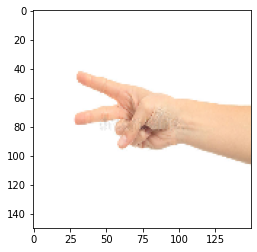

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predict image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

